In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df['id']=df['id'].astype('str')
df['host_id']=df['host_id'].astype('str')
df['latitude']=df['latitude'].astype('str')
df['longitude']=df['longitude'].astype('str')

In [7]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Categorical

In [9]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [17]:
df['neighbourhood_group'].value_counts(normalize=True)*100

Manhattan        42.814456
Brooklyn         42.345638
Queens           11.777131
Bronx             2.253935
Staten Island     0.808841
Name: neighbourhood_group, dtype: float64

In [18]:
df['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [19]:
df['room_type'].value_counts(normalize=True)*100

Entire home/apt    52.345380
Private room       45.475387
Shared room         2.179233
Name: room_type, dtype: float64

In [20]:
df['neighbourhood'].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [21]:
df['neighbourhood'].value_counts(normalize=True)*100

Williamsburg          8.147652
Bedford-Stuyvesant    8.090982
Harlem                5.677340
Bushwick              5.002447
Hell's Kitchen        3.936014
                        ...   
Holliswood            0.005152
New Dorp Beach        0.005152
Richmondtown          0.002576
Rossville             0.002576
Willowbrook           0.002576
Name: neighbourhood, Length: 218, dtype: float64

### Numerical

In [22]:
df['price'].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: price, dtype: int64

In [23]:
bins=(0,50,100,200,500,2000,10000)

In [24]:
df['price'].value_counts(bins=bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: price, dtype: int64

In [26]:
print(df["price"].mean(),df['price'].std())

142.33252621004095 196.99475591833985


In [27]:
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


### Visualisation

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

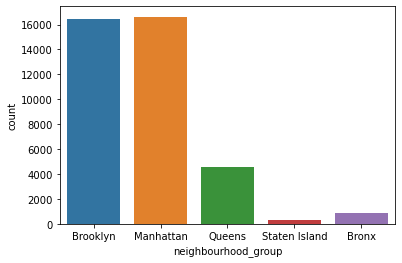

In [29]:
sns.countplot(data=df,x='neighbourhood_group')

In [ ]:
sns.countplot(data=df,x='')